## Final Model

### Imports

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import os

### Setting up DF

In [35]:
DIRECTORY = os.getcwd() + '/data-tech-challenge'

plane_data_df = pd.read_csv(DIRECTORY + '/data/plane_data_cleaned.csv')
plane_data_df.rename(columns={
    'Month': 'Date'
}, inplace=True)

plane_data_df['Route'] = plane_data_df['AustralianPort'] + ' - ' + plane_data_df['ForeignPort']

# selected route is Adelaide to Frankfurt
adelaide_to_frankfurt_df = plane_data_df[plane_data_df['Route'] == 'Adelaide - Frankfurt']

display(adelaide_to_frankfurt_df.head())

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,Route
3,1985-01-01,Adelaide,Frankfurt,Germany,115,0.009,0.0,171,0.000,0.248,286,0.009,0.248,1985,1,Adelaide - Frankfurt
164,1985-02-01,Adelaide,Frankfurt,Germany,235,0.021,0.0,146,0.000,0.244,381,0.021,0.244,1985,2,Adelaide - Frankfurt
323,1985-03-01,Adelaide,Frankfurt,Germany,133,2.847,0.0,192,0.025,0.325,325,2.872,0.325,1985,3,Adelaide - Frankfurt
480,1985-04-01,Adelaide,Frankfurt,Germany,84,0.222,0.0,113,0.000,0.385,197,0.222,0.385,1985,4,Adelaide - Frankfurt
644,1985-05-01,Adelaide,Frankfurt,Germany,0,0.000,0.0,79,0.000,0.243,79,0.000,0.243,1985,5,Adelaide - Frankfurt


### Prep Data

In [36]:
# select features
model_df = adelaide_to_frankfurt_df.copy()

X = model_df[['Year', 'Month_num']]
y = model_df['Passengers_Total']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = rf_reg.score(X_test, y_test)

print(f"Random Forest Regression Results:")
print(f"MSE: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.3f}")

Random Forest Regression Results:
MSE: 2676.69
R² Score: 0.607


### Expected vs predicted for test set

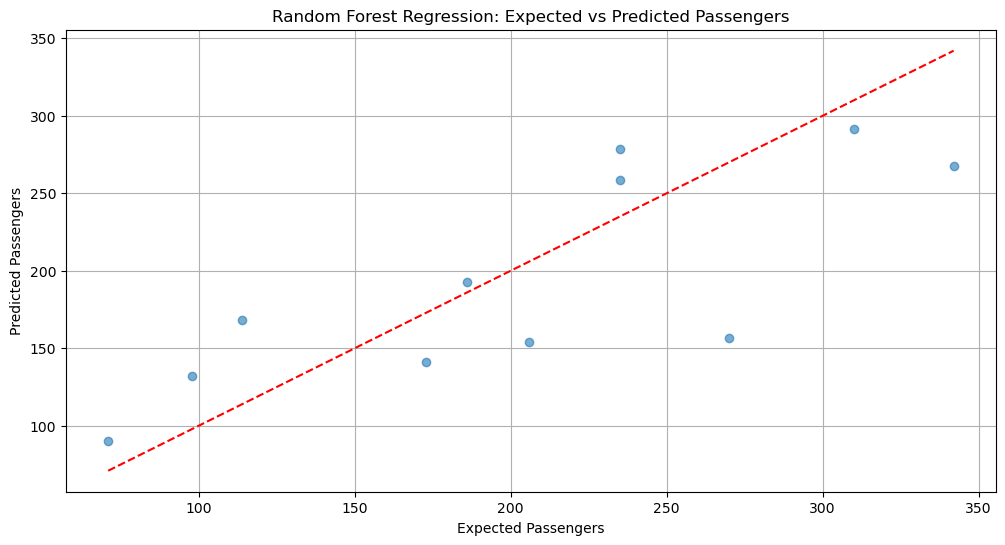

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest Regression: Expected vs Predicted Passengers')
plt.xlabel('Expected Passengers')
plt.ylabel('Predicted Passengers')
plt.grid()
plt.show()

### Predicting 12 months out

In [39]:
future_dates = pd.date_range(start='1989-08-01', periods=12, freq='M')
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month_num': future_dates.month,
})

future_predictions = rf_reg.predict(future_df)
future_df['Predicted_Passengers'] = future_predictions
display(future_df[['Year', 'Month_num', 'Predicted_Passengers']])

/var/folders/bk/smfh6q7x3sd0c29m12rcxls00000gn/T/ipykernel_82028/3454687413.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='1989-08-01', periods=12, freq='M')


,Year,Month_num,Predicted_Passengers
0,1989,8,120.603337
1,1989,9,157.503012
2,1989,10,183.784369
3,1989,11,185.400516
4,1989,12,265.988349
5,1990,1,281.007960
6,1990,2,291.189258
7,1990,3,294.481913
8,1990,4,179.609675
9,1990,5,132.205131
